<a href="https://colab.research.google.com/github/sebaa03/UcimlRepo/blob/main/CcsDatosEconm%C3%ADa_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A continuación usaremos el set de dato Adult, con información que busca predecir si el ingreso anual de un individuo superan los US$50000 al año basándose en los datos del censo.

Los datos se encuentran disponible en el repositorio de [UC Irvine](https://archive.ics.uci.edu/dataset/2/adult),quienes disponen de una bilioteca para importar datos con Python.

A continuación procederemos a importar dichos datos.

```python
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)
  
# Guarda como dataframe
df = adult.data.original
```

## Parte 1: Análisis Exploratorio de los Datos

Para esta primera parte se pide realizar algunas tareas básicas:


- Importar y explorar el dataset
- Detección de valores faltante
- Limpieza de datos
- Análisis univariado: Puedes realizar gráficos como histogramas y gráficos de barras para visualizar la distribución de los datos.
- Análisis bivariado: Utiliza gráficos como boxplots para comparar la distribución de variables relevantes en relación a la variable target
- Correlaciones y visualización multivariada

Recuerda que cada etapa debe contar con una introducción a la tarea a realizar junto con una Síntesis de hallazgos

**Una vez finalizada esta parte debe generar un commit a la carpeta de GitHub que ha creado para esta evaluación**

In [ ]:
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)

# Guarda como dataframe
df = adult.data.original

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)

# Guarda como dataframe
df = adult.data.original

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
import pandas as pd

# Ver cantidad de valores únicos por columna
print("Valores únicos por columna:\n")
print(df.nunique(dropna=False))



print("Valores faltantes por columna:\n")
print(df.isnull().sum())



Valores únicos por columna:

age                  74
workclass            10
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           16
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       43
income                4
dtype: int64
Valores faltantes por columna:

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


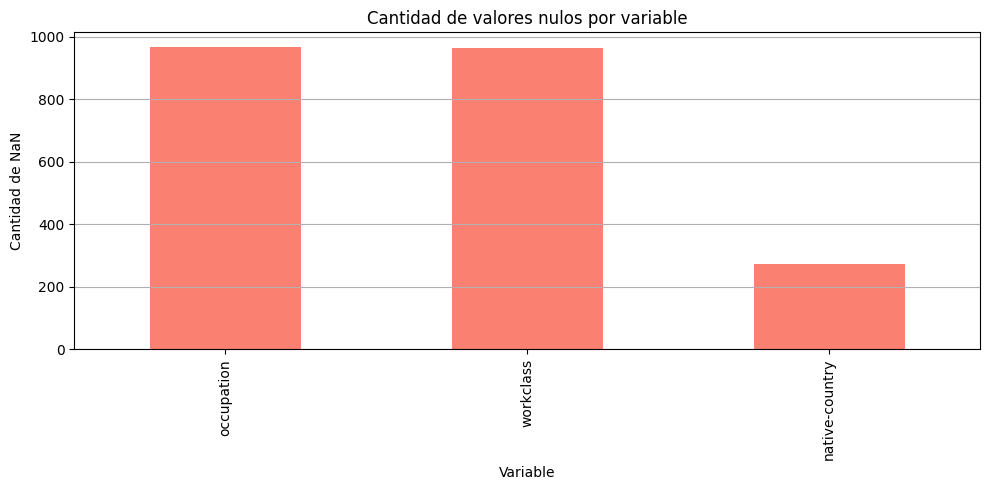

In [ ]:
import matplotlib.pyplot as plt

# Contar valores nulos por columna
nulos = df.isnull().sum()
nulos = nulos[nulos > 0].sort_values(ascending=False)

# Graficar
plt.figure(figsize=(10, 5))
nulos.plot(kind='bar', color='salmon')
plt.title("Cantidad de valores nulos por variable")
plt.ylabel("Cantidad de NaN")
plt.xlabel("Variable")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


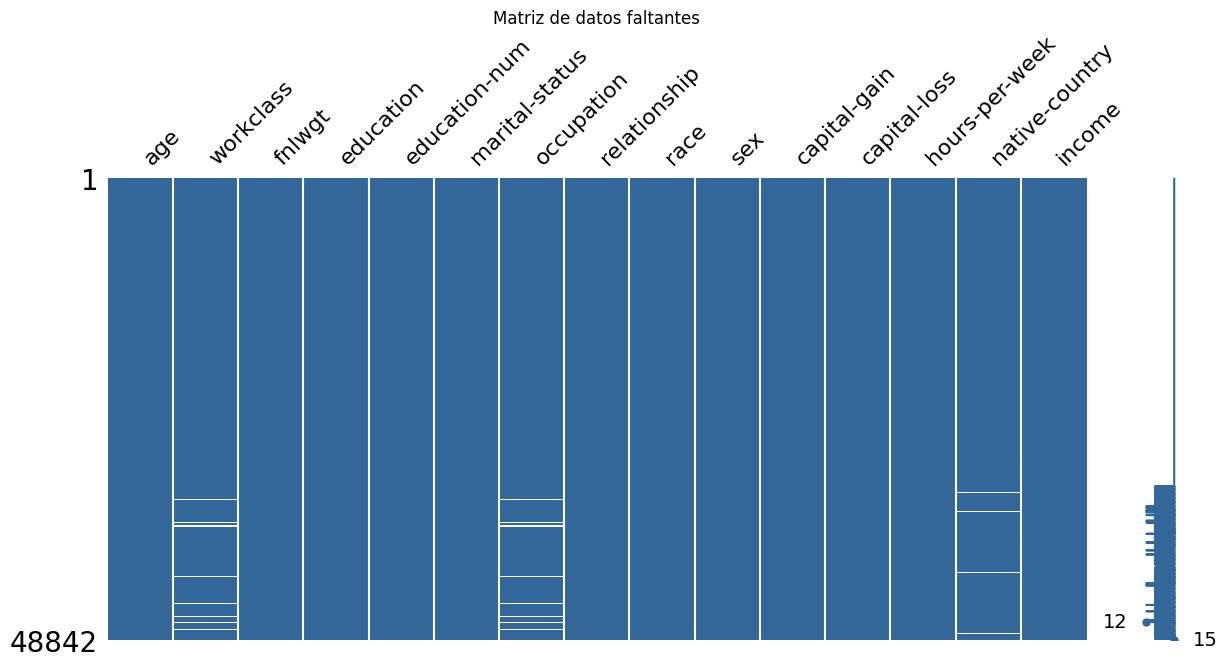

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualizar matriz de datos nulos
msno.matrix(df, figsize=(14, 6), color=(0.2, 0.4, 0.6))
plt.title("Matriz de datos faltantes")
plt.show()


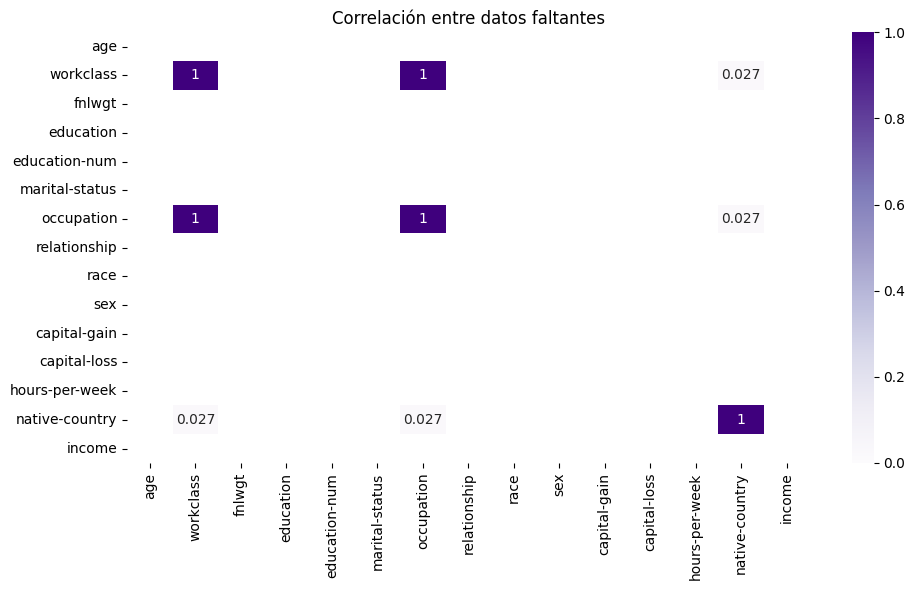

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear DataFrame booleano: True si es NaN, False si no
nulos_bool = df.isnull()

# Calcular correlación entre patrones de nulos
correlacion_nulos = nulos_bool.corr()

# Graficar la matriz
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion_nulos, annot=True, cmap="Purples", vmin=0, vmax=1)
plt.title("Correlación entre datos faltantes")
plt.tight_layout()
plt.show()


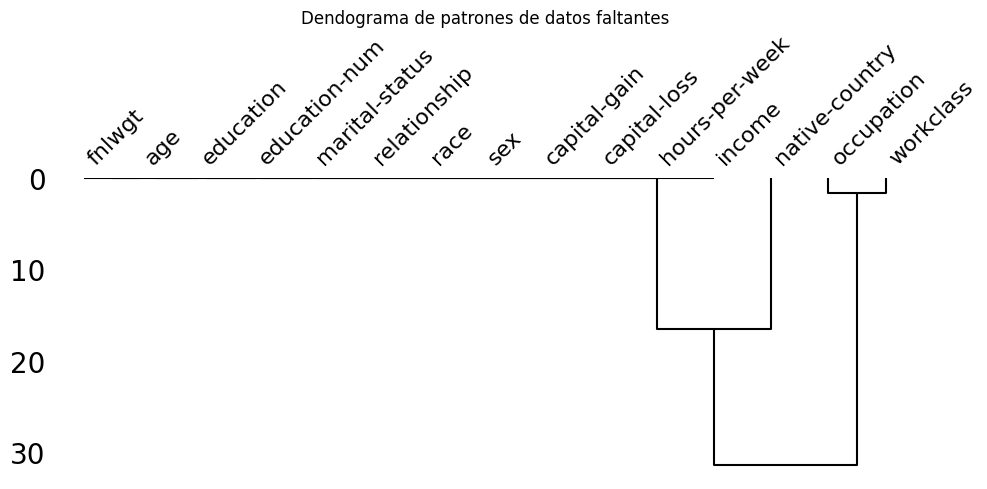

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Dendograma de patrones de datos faltantes
msno.dendrogram(df, figsize=(10, 5))
plt.title("Dendograma de patrones de datos faltantes")
plt.tight_layout()
plt.show()

 La correlación perfecta entre workclass y occupation indica que sus valores faltantes ocurren simultáneamente, por lo que se decidió eliminar esas filas para no imputar categorías arbitrarias. Por otro lado, la variable native-country presenta un porcentaje mínimo de valores faltantes, por lo que imputaremos por el dato que mas se repite , en este caso United States

In [ ]:

df = df.dropna(subset=['workclass', 'occupation'])


df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)



/tmp/ipython-input-10-417666416.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)
/tmp/ipython-input-10-417666416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)


In [ ]:
import matplotlib.pyplot as plt

# Contar valores nulos por columna
nulos = df.isnull().sum()
nulos = nulos[nulos > 0].sort_values(ascending=False)
nulos


,0


# Limpieza de datos

Remplazamos los "?" de las categorias mencionadas por sin informacion

In [ ]:
print(df['workclass'].unique())
print(df['occupation'].unique())
print(df['native-country'].unique())

df['native-country'] = df['native-country'].replace('?', 'No-informado')
df['occupation'] = df['occupation'].replace('?', 'No-informado')
# Para 'workclass'
df['workclass'] = df['workclass'].replace('?', 'No-informado')




['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


/tmp/ipython-input-12-3594890241.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['native-country'] = df['native-country'].replace('?', 'No-informado')
/tmp/ipython-input-12-3594890241.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation'] = df['occupation'].replace('?', 'No-informado')
/tmp/ipython-input-12-3594890241.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Incialmente la variable income contaba con un "." al final , por lo cual decidimos quitarlo , ademas como muestra si el ingreso es mayor a 50k. decidimos entonces tomar esta variable como una dummy de 1 , es mayor a 50k o 0 en caso contrario.

In [ ]:


print(df['income'].unique())


df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)



df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

print("Valores finales de income (dummy):")
print(df['income'].unique())
print(df['income'].value_counts())


['<=50K' '>50K' '<=50K.' '>50K.']
Valores finales de income (dummy):
[0 1]
income
0    36263
1    11613
Name: count, dtype: int64


/tmp/ipython-input-13-59624755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)
/tmp/ipython-input-13-59624755.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})


In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [ ]:
print(df['education'].unique())

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


# analisis de graficos

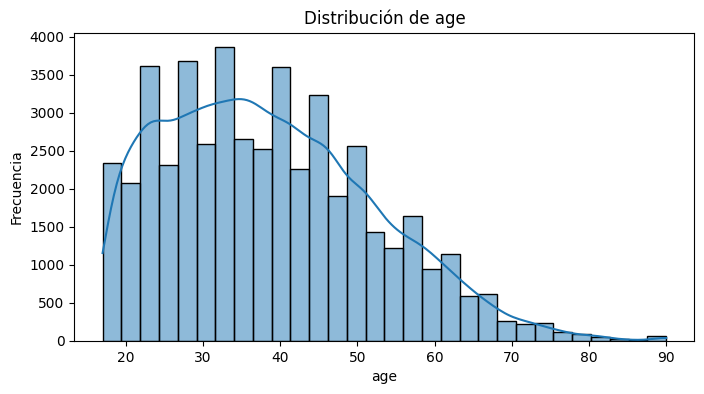

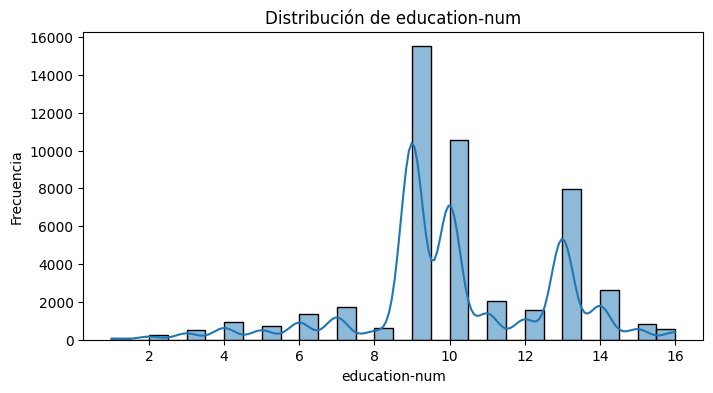

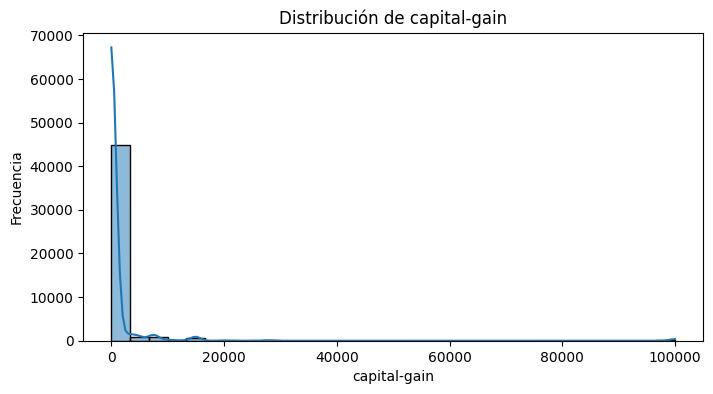

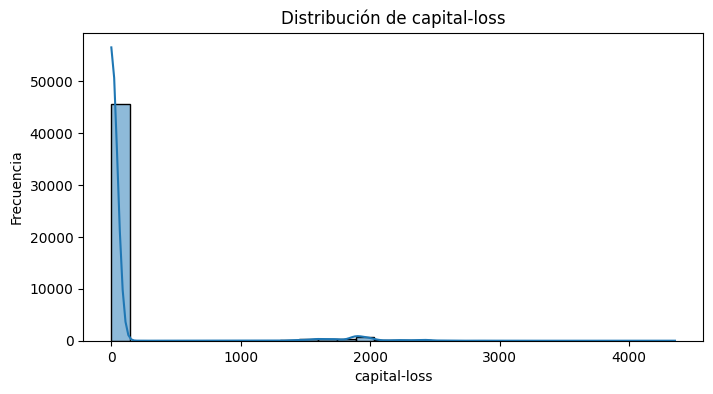

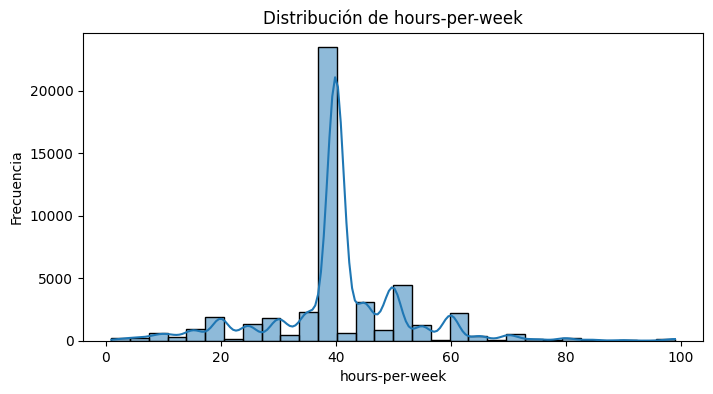

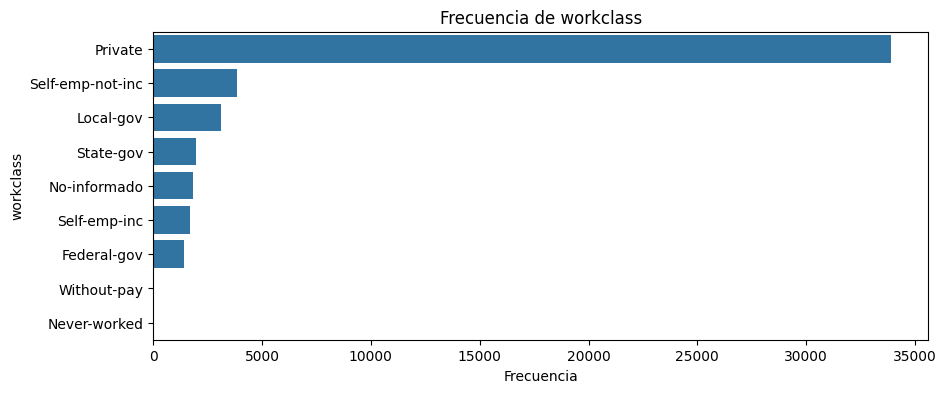

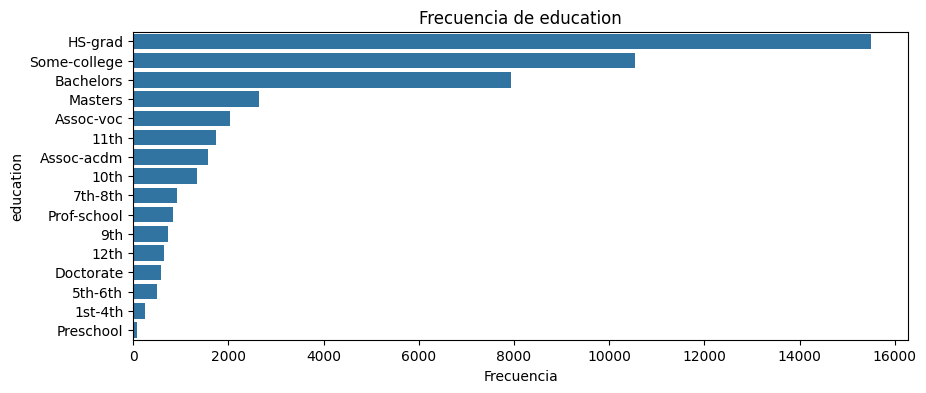

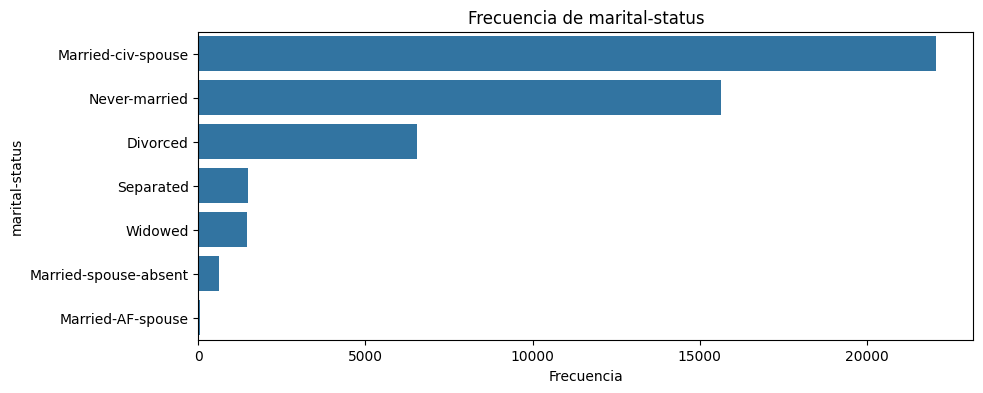

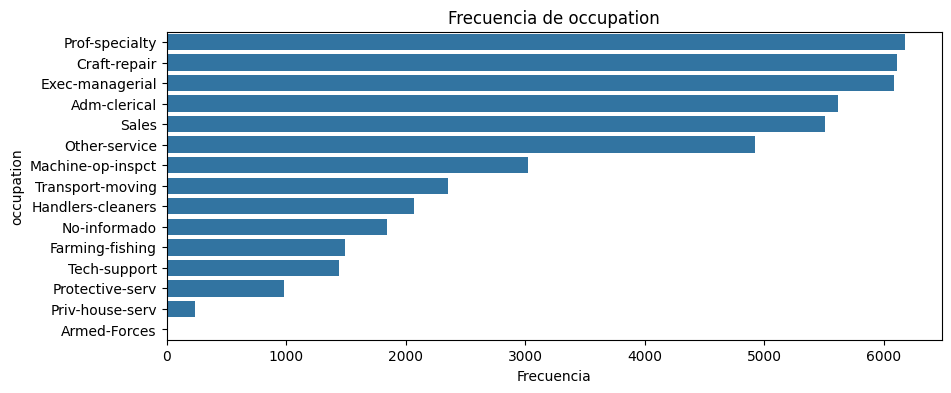

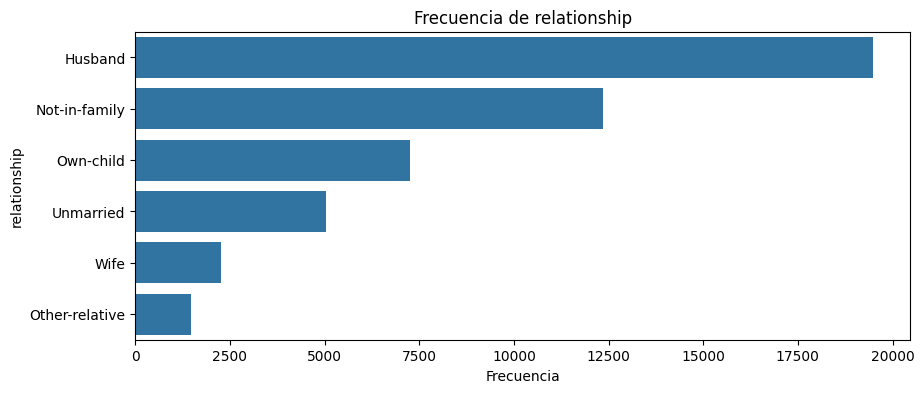

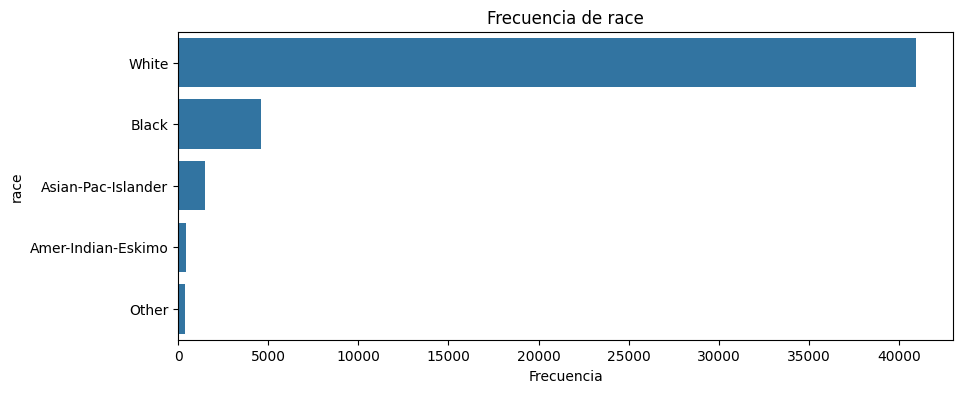

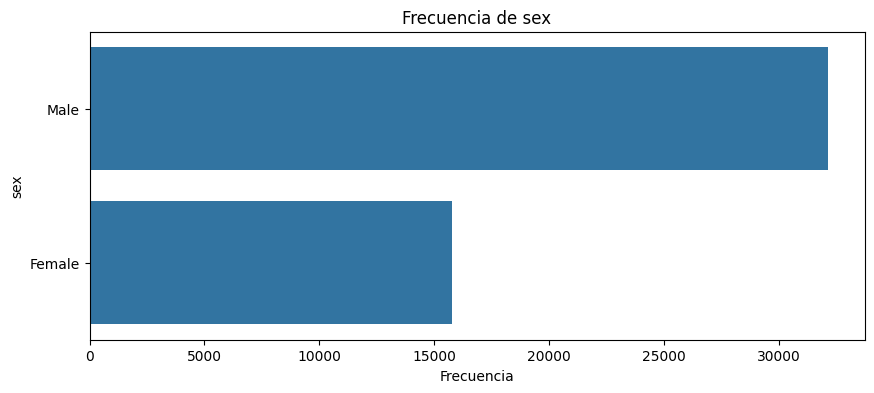

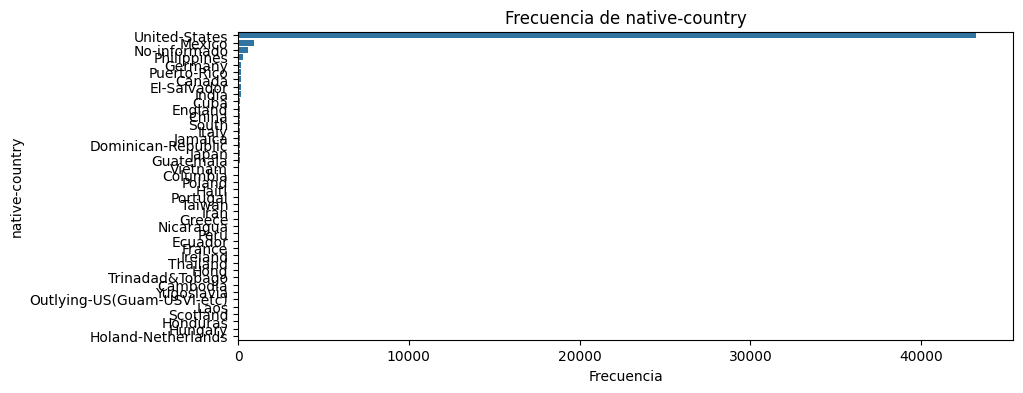

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


num_vars = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


for col in num_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


cat_vars = ['workclass', 'education', 'marital-status',
            'occupation', 'relationship', 'race', 'sex', 'native-country']


for col in cat_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Frecuencia de {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.show()


Se puede observar en el primer grafico que la principal frecuencia de personas se encuntra entre cercana a los 30 y 40 años, lo cual es coherente con respecto a la poblacion activa laboralmente

---

en el segundo grafico observamos que la mayor frecuencia con respecto a los 9 y 10 años lo que indicaria como nivel "basico " en terminso superior de estudio sin embargo tenemos tambien un grupo que se nos aleja 13 años, quien se podria determinar con mayores oportuynidades de estudfios frente a frecuencia estimada

---
 En el quinto grafico obsrervamos que gran parte de poblacion se concentra (frecuencia mayor) en trabajar 40 horas por semana lo cual diriamos que esta dentro de lo razonable


---


vemos que en el grafico 6 el workclass quwe mas pondera en terminso de frecuencia es el privado lo que indicaria que el sector privado es quien potencia el estudio


---
en el septimo grafico vemos la ponderacion que tienen a nivel de estudio la indicar cual es el rango alcanzado a nivel de estudio, vemos una frecuencia muy alta en los "rangos superiores" de estudio lo cula indicaria una poblacion con estudios "basicos " completados.


---
En el grafico 11 vemos que principalmente  se concentra en individuos de raza de blanca por sobre las demas, no indicando un problema de racismo sino que por temas de poblacion pondera auna mas los atributos de raza blnca,


---
en el grafico doce observamos una mayor participacion maculina lo que indicaria una mayor participacion en terminso laborales por sobre la mujer casi a una proporcion 2 hombre cada 1 muje

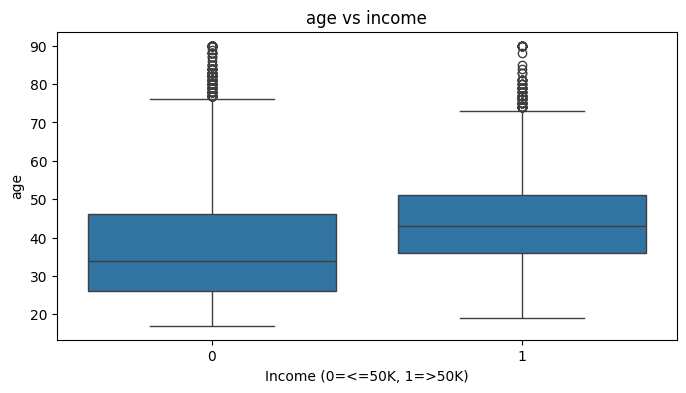

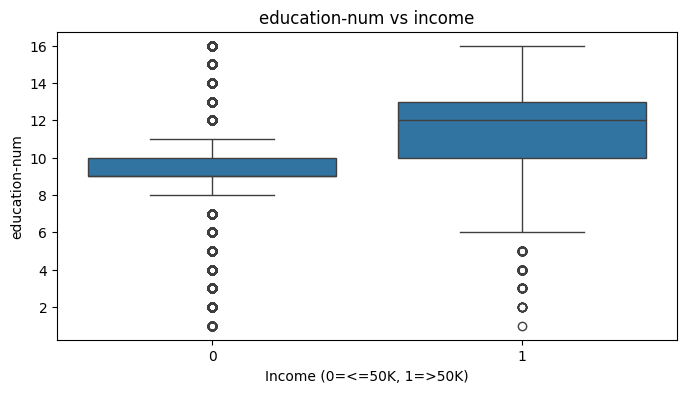

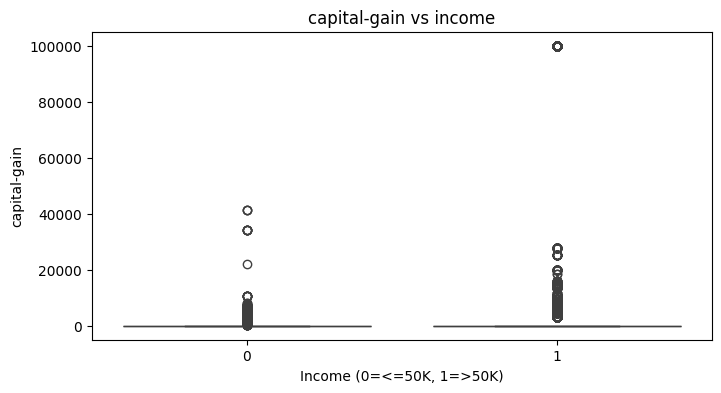

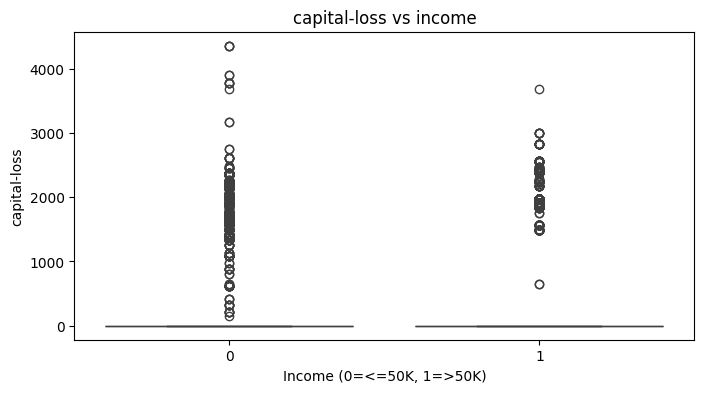

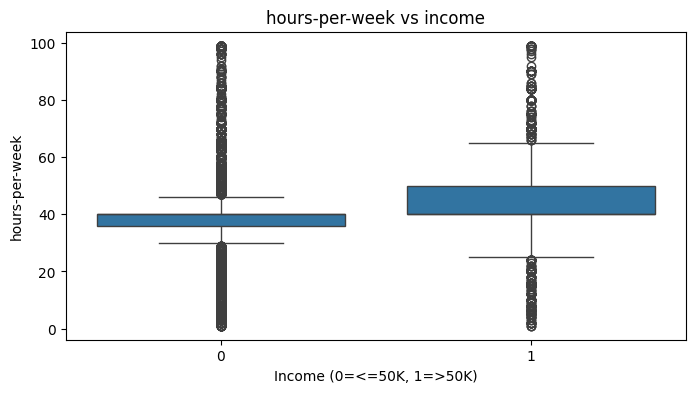

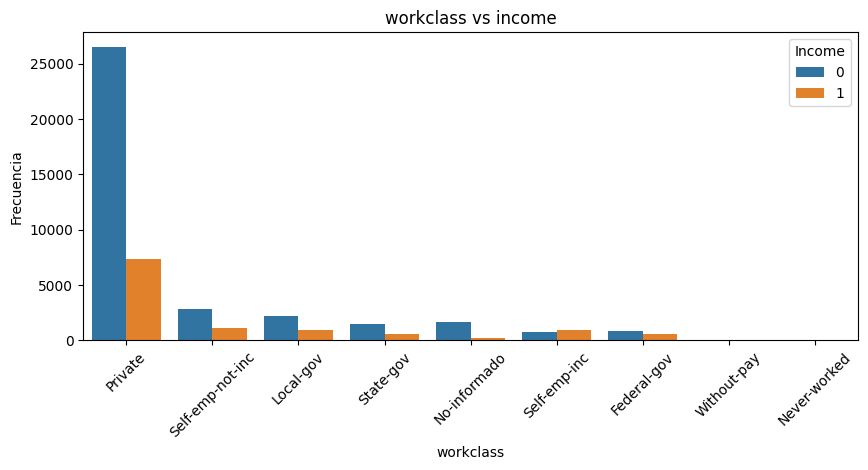

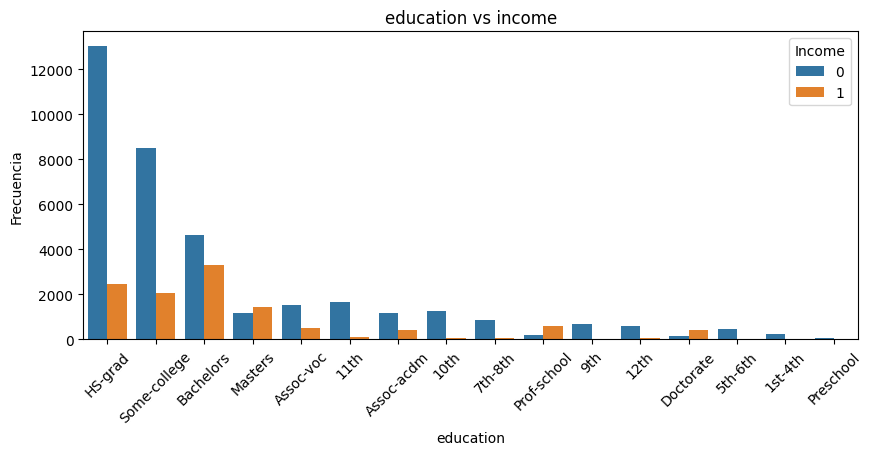

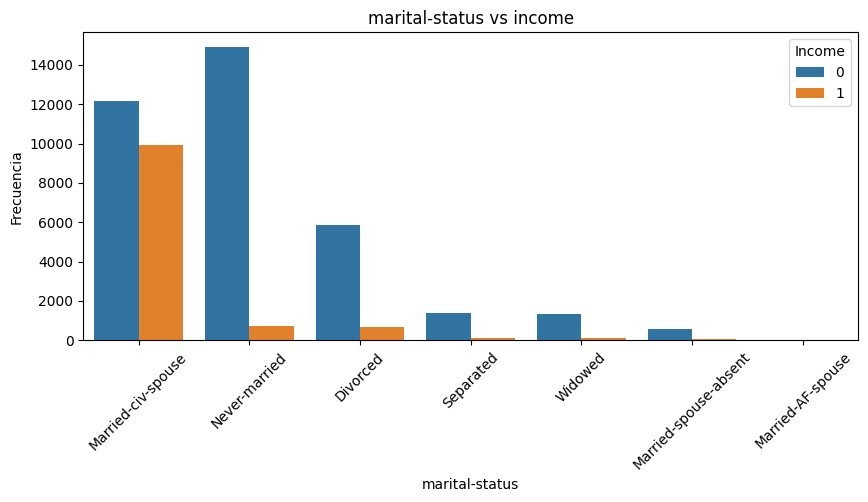

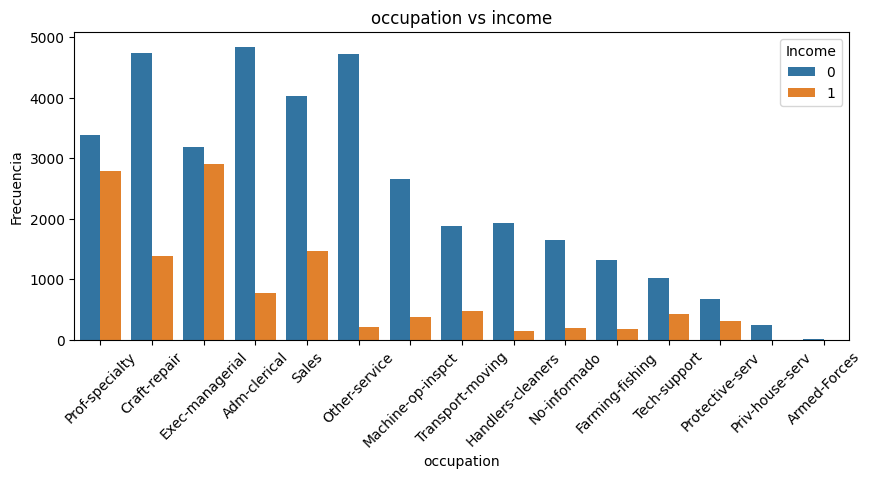

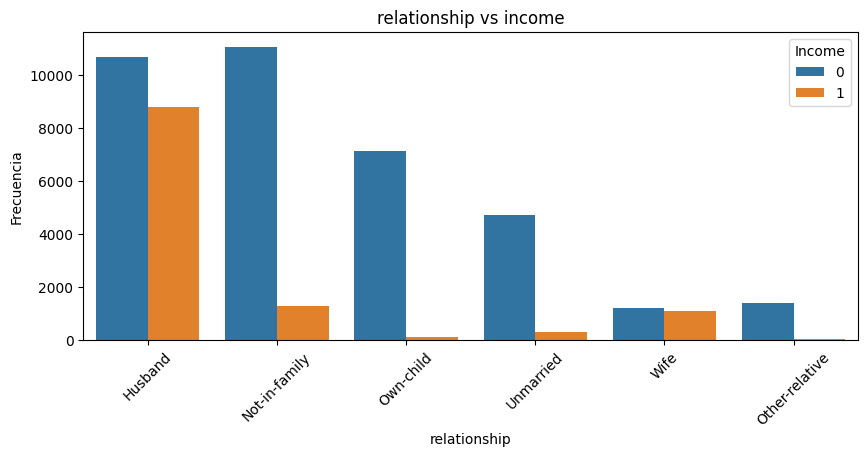

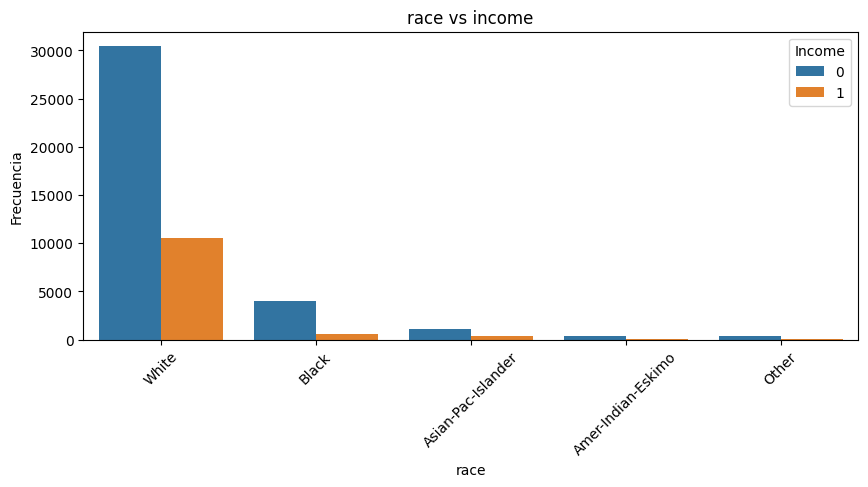

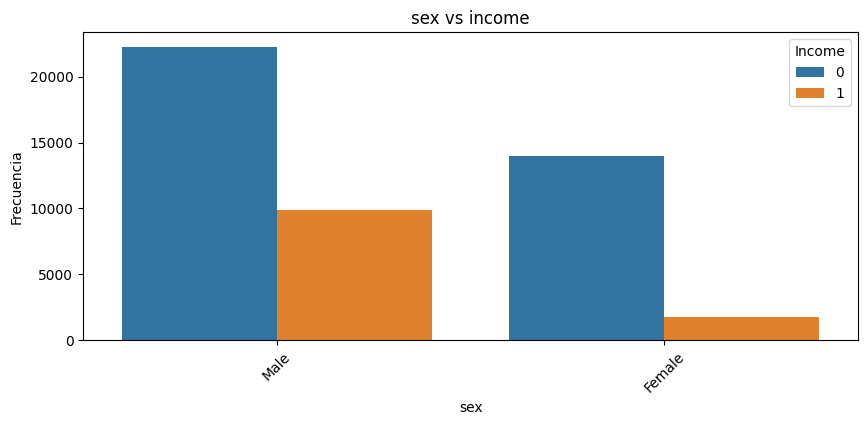

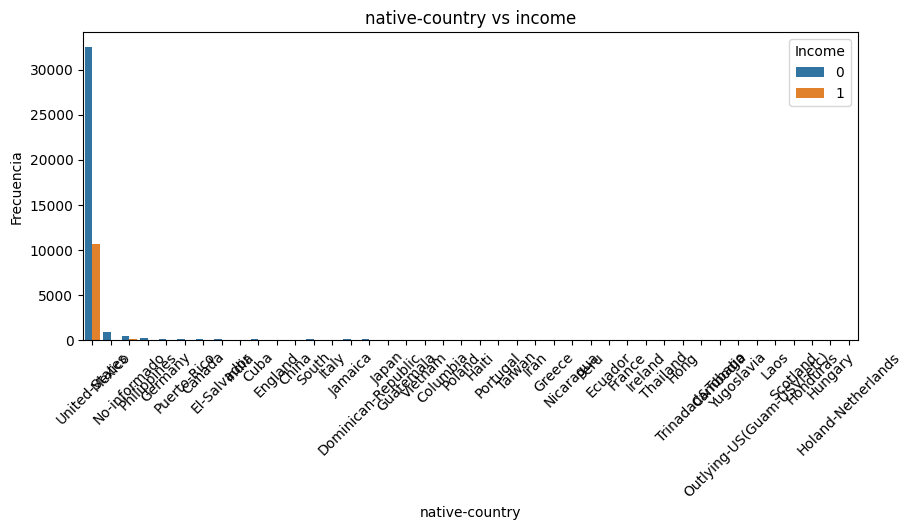

In [ ]:

for col in num_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='income', y=col, data=df)
    plt.title(f'{col} vs income')
    plt.xlabel('Income (0=<=50K, 1=>50K)')
    plt.ylabel(col)
    plt.show()

for col in cat_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='income', data=df, order=df[col].value_counts().index)
    plt.title(f'{col} vs income')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.legend(title='Income')
    plt.show()


Podemos ir viendo que existe una leve diferencia en la distribucion de age vs income, dado que los salarios mas altos se encuentran tambien concentrados en mayores edades. mientras que la diferencia es mas amplia en los años de educacion contra el ingreso. donde mientras mas años , la distribucion tiene una mayor dispersion. incluso datos atipicos donde poca educacion a significado un ingreso sobre 50k. las distribuciones son bastantes similares en capital ganado vs ingreso, no notando un cierto patron como tal. lo mismo pasa en capital perdido. Se puede ver que en horas por semana contra ingreso , si existe una diferencia en los salarios significativa. Una mayor hora de trabajo , no necesariamente aseguran un mayor salario , de echo , existen muchos datos atipicos en salarios menores a 50k , donde se ve una  mayor dispercion.
Sobre la clase de trabajo , podemos ver que no depende como tal para ver donde estan los mayores salarios, por logica la mayoria de personas estan en el sector privado con salarios menores a 50k . Dado que es donde existe una mayor oferta laboral. Es interesante ver que segun el tipo de trabajo existe una mayor dispersion entre los salarios mayores y menores, podemos destacar que la mayor frecuencia se da en Bacheelors para los mayores y High school para los menores ,  un patron particular , es el echo de que la mayor frecuencia de salarios se da en la categoria casados, mostrando que esa estabilidad sentimental , esta relacionada con el salario alcanzado. vs personas solteras que no alcanzan en su mayoria estos. Categorias como raza, sexo y pais de origen , no seran tomadas para buscar factores asociados a mayores ingresos , por cuestiones eticas a la hora de analizar los datos


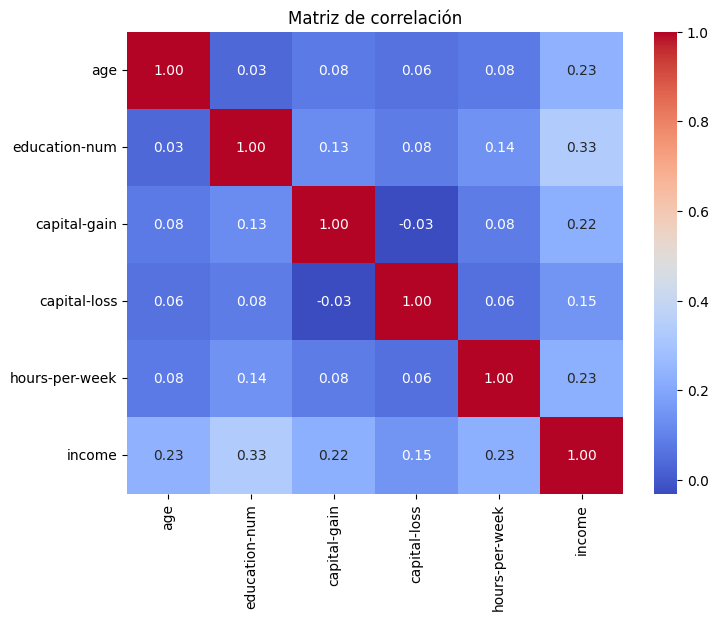

In [ ]:

corr = df[num_vars + ['income']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()


Matriz de correlacion, vemos que existe una correlacio mas alta entre income y educ-num. mostrando que puede existir una corrlacion entre años e ingresos superiores. hours per week y age tambien estan correlacionadas positvamente, personas que trabajan mas , poseen una mayor edad. ademas los capital gain tienen una correlacion con income de 0,22, por lo cual mayores ganancias se asocian a sueldos mas altos. Estudiar principalmente la correlacion con ingreso  y notar que no existe correlaciones perfectas entre variables. Nos permiten pensar en ciertos resultados esperados para nuestros modelos de clasificacion.

## Parte 2: Modelo de Clasificación

Una vez que el conjunto de datos ha sido limpiado y preprocesado correctamente, el siguiente paso consiste en construir y evaluar modelos de clasificación binaria, cuyo objetivo es predecir si una persona gana más de US$50.000 anuales.

Para ello, utilice la biblioteca Lazypredict, la cual permite realizar una comparación exploratoria de múltiples modelos de clasificación estándar sin necesidad de definir previamente sus hiperparámetros. Esta herramienta resulta especialmente útil como punto de partida para identificar qué algoritmos presentan un mejor desempeño inicial sobre un conjunto de datos determinado.

Divida el dataset en un 80% para entrenamiento y un 20% para prueba, asegurándose de que todas las variables estén correctamente codificadas y preparadas para el análisis.

Además de ejecutar los modelos con Lazypredict, deberá:

- Comentar las ventajas y limitaciones de esta biblioteca en el contexto de una primera evaluación comparativa.

- Analizar los resultados obtenidos, identificando los modelos con mejor y peor desempeño.

**Una vez terminada esta parte debe actualizar su repositorio en GitHub**

Dado el analisis estadistico anterior y de correlaciones, tomamos la  desicion de no incluir algunas variables para el modelo como el pais de origen , sexo , raza,  work class, que hace referencia al sector donde trabaja. Ademas , solo su relacionship , dado que tiene relacion con con su estado civil. Las variables numericas presentes en el data frame no estan correlacionadas entre si y aparte , tienen correlacion con la variable de estudio income. De estas solo descartaremos las horas por hora , porque no nos da indicios claros de una tendencia a una u otra categoria  

Nos dimos cuenta tambien que separar la educacion como una variable dummy de los que alcanzaron una eduacion superior , simplificaremos el analisis del modelo, pero sera despues de haber estudiado todo.

Como haremos un modelo random forest, una estandarizacion nos permitira ser mas precesisos para suavizar el efecto en las variables numericas

In [ ]:

# Revisar valores únicos otra vez para confirmar
print(df['education'].unique())

# Definir niveles de educación superior
educacion_superior = [
    'Bachelors',
    'Masters',
    'Doctorate',
    'Prof-school',
    'Assoc-acdm',
    'Assoc-voc',
    'Some-college'
]

# Crear nueva variable dummy
df['education_superior'] = df['education'].apply(lambda x: 1 if x in educacion_superior else 0)



['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


/tmp/ipython-input-20-2728145153.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_superior'] = df['education'].apply(lambda x: 1 if x in educacion_superior else 0)


In [ ]:

cols = [
    'age',
    'education-num',
    'occupation',
    'relationship',
    'capital-gain',
    'capital-loss',
    'income',
    'education_superior'
]


df = df[cols].copy()



In [ ]:
df

,age,education-num,occupation,relationship,capital-gain,capital-loss,income,education_superior
0,39,13,Adm-clerical,Not-in-family,2174,0,0,1
1,50,13,Exec-managerial,Husband,0,0,0,1
2,38,9,Handlers-cleaners,Not-in-family,0,0,0,0
3,53,7,Handlers-cleaners,Husband,0,0,0,0
4,28,13,Prof-specialty,Wife,0,0,0,1
...,...,...,...,...,...,...,...,...
48836,33,13,Prof-specialty,Own-child,0,0,0,1
48837,39,13,Prof-specialty,Not-in-family,0,0,0,1
48839,38,13,Prof-specialty,Husband,0,0,0,1
48840,44,13,Adm-clerical,Own-child,5455,0,0,1


In [ ]:

from sklearn.model_selection import train_test_split


X = df.drop('income', axis=1)
y = df['income']


X_encoded = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (38300, 24)
Test shape: (9576, 24)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd


X = df.drop('income', axis=1)
y = df['income']


X = pd.get_dummies(X, drop_first=True)


num_vars = ['age', 'education-num', 'capital-gain', 'capital-loss']
cat_vars = [col for col in X.columns if col not in num_vars]

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[num_vars])


X_scaled = pd.DataFrame(X_num_scaled, columns=num_vars, index=X.index)
X_final = pd.concat([X_scaled, X[cat_vars]], axis=1)


X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)





Train shape: (38300, 24)
Test shape: (9576, 24)


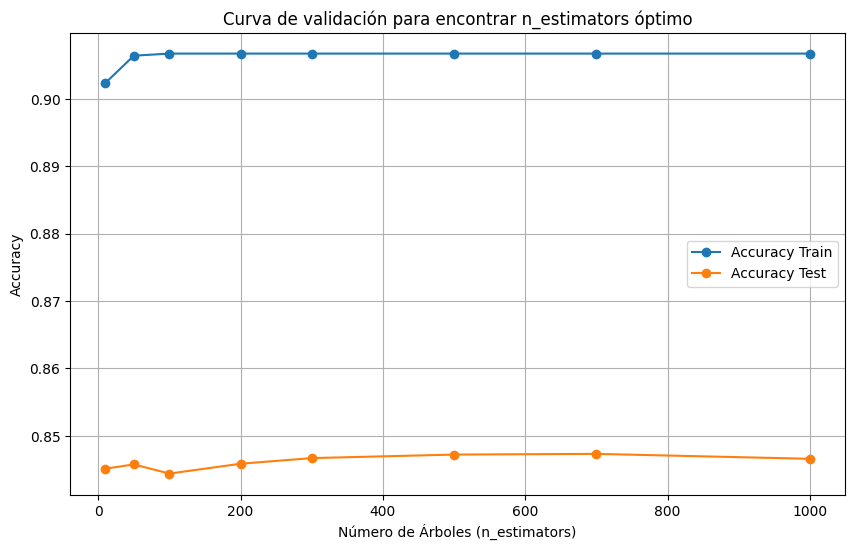

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)


n_estimators_range = [10, 50, 100, 200, 300, 500, 700, 1000]

train_scores = []
test_scores = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, rf.predict(X_train))
    test_acc = accuracy_score(y_test, rf.predict(X_test))

    train_scores.append(train_acc)
    test_scores.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, label='Accuracy Train', marker='o')
plt.plot(n_estimators_range, test_scores, label='Accuracy Test', marker='o')
plt.xlabel('Número de Árboles (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Curva de validación para encontrar n_estimators óptimo')
plt.legend()
plt.grid(True)
plt.show()


Ocupamos un numero de 200 donde se estabiliza el acurrancy

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


importances = pd.Series(rf.feature_importances_, index=X_final.columns).sort_values(ascending=False)
print("\nFeature Importances:\n", importances)

Accuracy: 0.8458646616541353

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      7253
           1       0.70      0.63      0.67      2323

    accuracy                           0.85      9576
   macro avg       0.79      0.77      0.78      9576
weighted avg       0.84      0.85      0.84      9576


Confusion Matrix:
 [[6630  623]
 [ 853 1470]]

Feature Importances:
 age                             0.302637
capital-gain                    0.179213
education-num                   0.130077
relationship_Not-in-family      0.079108
capital-loss                    0.065622
relationship_Unmarried          0.049507
relationship_Own-child          0.048125
education_superior              0.030932
occupation_Exec-managerial      0.024474
occupation_Prof-specialty       0.014781
occupation_Other-service        0.012975
relationship_Other-relative     0.011104
relationship_Wife               0.010253
occupation_Sales

La curva de validación muestra que a partir de aproximadamente 200 árboles , el desempeño del modelo se estabiliza y no hay mejoras significativas en la precisión  del conjunto de prueba. Esto indica que añadir más árboles solo aumenta el costo computacional sin aportar ganancia real en rendimiento.

Se evidencia un accuracy global de 85%, con muy buen desempeño prediciendo las personas menores a 50k, mientras que la clase minoritaria  presenta menor recall 63% y f1-score 67%. Nuestro modelo aun falla o se pueden encontrar màs variables para lograr predecir nuestra categoria de interes que es los mayores de 50.